# ML supervisado con scikit-learn 
Este notebook contiene el código para el curos de "ML supervisado con scikit-learn". Las librerias que se han usado son

```
pandas==1.1.5
plotnine==0.8.0
scikit-learn==0.24.2
```

Los datos utilizados son de Tweets descargados durante unos dias en agosto. Se pueden descargar [aquí](DATA).

Generalmente se cargaran as librerias cuando se utilicen. Esto no es necesariamente la mejor practica en general, pero lo hacemos asi para que sea más claro de donde vienen ciertas funciones.

In [13]:
import pandas as pd
import plotnine as pn

data_location = 'tweet_and_user_data.csv'

pd.options.display.max_columns = 500

In [2]:
tweet_data = pd.read_csv(data_location)

/home/andreas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tweet_data.shape

(23057, 56)

In [6]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,202,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,1426598917471305735,1426598917471305735,1.628963e+12,2021-08-14 19:37:41,200,NaN,RT @peterdaou: An Italian town hit 124 degrees...,en,['climateemergency'],[],21447363,21447363,katyperry,KATY PERRY,6,19,https://twitter.com/katyperry/status/142659891...,[],[],0,NaN,True,0,0,407,0,None,NaN,NaN,NaN,1.846427e+07,"An Italian town hit 124 degrees, possibly the ...",1.426281e+18,[],2021-08-13 22:32:52 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
2,1425588921233133572,1425588921233133572,1.628722e+12,2021-08-12 00:44:19,200,NaN,Thank you @MTV @vmas! ⚔️💓 https://t.co/iyo2KW...,en,[],[],14230524,14230524,ladygaga,Lady Gaga,4,0,https://twitter.com/ladygaga/status/1425588921...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/14255...,False,41136,1005,5156,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
3,1426896158958526466,1426896158958526466,1.629034e+12,2021-08-15 15:18:49,200,NaN,Me watching #FreeGuy for the 9th time in a row...,en,['freeguy'],[],19248106,19248106,MariahCarey,Mariah Carey,7,15,https://twitter.com/MariahCarey/status/1426896...,[],['https://pbs.twimg.com/tweet_video_thumb/E81a...,1,https://pbs.twimg.com/tweet_video_thumb/E81ae3...,False,12909,250,1042,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...
4,1426198521250734089,1426192006154539008,1.628867e+12,2021-08-13 17:06:39,200,NaN,https://t.co/Fjua6JytBh,und,[],[],19248106,19248106,MariahCarey,Mariah Carey,5,17,https://twitter.com/MariahCarey/status/1426198...,['http://youtu.be/qq09UkPRdFY'],[],0,NaN,False,1416,57,248,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...


No es necesario hacer una gran introducción a los datos ya que no es nuestro foco, pero para resumir:

* Tenemos X Tweets de unas cuentas famosas de Twitter
* Las variables son informacion estandar que nos facilita Twitter
* También incluimos información sobre las cuentas en si, también con datos facilitados por el API de Twitter

## Entrenando el primer modelo
Entrenamos unas regresiones sencillas para mostrar el sintaxis. Cogemos un par de variables y el numero de "likes" del Tweet como el target. Nota que no dividimos entre train y test.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X_variables = ['followers', 'video']
y_variable = 'nlikes'

In [11]:
model = LinearRegression()
model.fit(tweet_data[X_variables], tweet_data[y_variable])
tweet_data['predictions_lin_reg'] = model.predict(tweet_data[X_variables])

In [12]:
model = DecisionTreeRegressor(random_state=0)
model.fit(tweet_data[X_variables], tweet_data[y_variable])
tweet_data['predictions_dt_reg'] = model.predict(tweet_data[X_variables])

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 256 rows containing missing values.


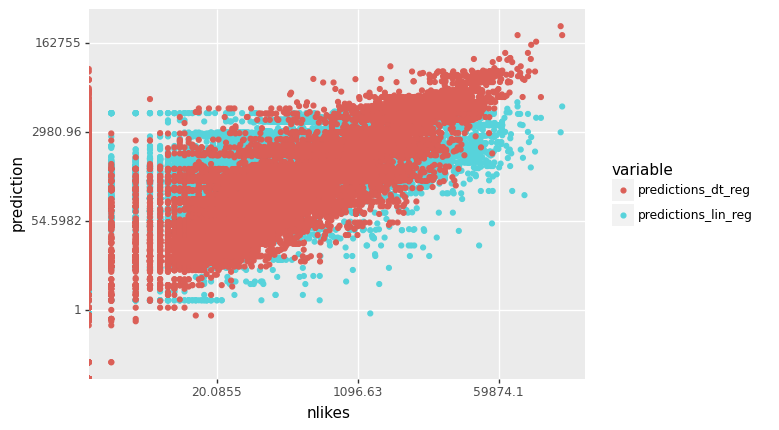

In [19]:
# Creamos un grafico simple para visualizar
columns = [y_variable, 'predictions_lin_reg', 'predictions_dt_reg']
graph_data = pd.melt(tweet_data[columns], y_variable)
graph = (
    pn.ggplot(graph_data, pn.aes(x='nlikes', y='value', color='variable')) 
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
    + pn.ylab('prediction')

)

graph.draw();

## Los requisitos minimos para los datos
Ahora mostramos cómo sacamos nuestro "X" y "y" de los datos crudos.

In [20]:
X = tweet_data[X_variables]
y = tweet_data[y_variable]

In [21]:
X.head()

,followers,video
0,20854298,0
1,108819032,0
2,83675119,1
3,21612341,1
4,21612341,0


In [22]:
y.head()

0        0
1        0
2    41136
3    12909
4     1416
Name: nlikes, dtype: int64

In [26]:
model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

array([ 1976.87217029, 10400.51167112,  8472.12296373,  2528.89498453,
        2049.4635449 ,  2528.89498453,  2528.89498453,  8498.03048569,
        8018.59904606, 10889.71272264])

Qué pasa si incluimos datos de texto o diferentes números de filas?

In [27]:
# Incluyendo datos de texto
X_variables = ['language', 'name']

X = tweet_data[X_variables]
y = tweet_data[y_variable]

model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

ValueError: could not convert string to float: 'en'

In [28]:
X_variables = ['followers', 'video']

# Ahora cogemos solo 2000 filas para el X
X = tweet_data[X_variables].sample(2000, random_state=0)
y = tweet_data[y_variable]

model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

ValueError: Found input variables with inconsistent numbers of samples: [2000, 23057]

## Ejemplos de pasos previos
Vamos a mostrar algunos pasos previos para dar contexto sobre la preparación de los datos.

In [29]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,202,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...,1976.872170,0.000000
1,1426598917471305735,1426598917471305735,1.628963e+12,2021-08-14 19:37:41,200,NaN,RT @peterdaou: An Italian town hit 124 degrees...,en,['climateemergency'],[],21447363,21447363,katyperry,KATY PERRY,6,19,https://twitter.com/katyperry/status/142659891...,[],[],0,NaN,True,0,0,407,0,None,NaN,NaN,NaN,1.846427e+07,"An Italian town hit 124 degrees, possibly the ...",1.426281e+18,[],2021-08-13 22:32:52 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...,10400.511671,0.000000
2,1425588921233133572,1425588921233133572,1.628722e+12,2021-08-12 00:44:19,200,NaN,Thank you @MTV @vmas! ⚔️💓 https://t.co/iyo2KW...,en,[],[],14230524,14230524,ladygaga,Lady Gaga,4,0,https://twitter.com/ladygaga/status/1425588921...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/14255...,False,41136,1005,5156,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...,8472.122964,41136.000000
3,1426896158958526466,1426896158958526466,1.629034e+12,2021-08-15 15:18:49,200,NaN,Me watching #FreeGuy for the 9th time in a row...,en,['freeguy'],[],19248106,19248106,MariahCarey,Mariah Carey,7,15,https://twitter.com/MariahCarey/status/1426896...,[],['https://pbs.twimg.com/tweet_video_thumb/E81a...,1,https://pbs.twimg.com/tweet_video_thumb/E81ae3...,False,12909,250,1042,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...,2528.894985,24613.333333
4,1426198521250734089,1426192006154539008,1.628867e+12,2021-08-13 17:06:39,200,NaN,https://t.co/Fjua6JytBh,und,[],[],19248106,19248106,MariahCarey,Mariah Carey,5,17,https://twitter.com/MariahCarey/status/1426198...,['http://youtu.be/qq09UkPRdFY'],[],0,NaN,False,1416,57,248,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/13

In [34]:
# Remplezamos un valor
tweet_data.quote_url.replace('0', '')

0         
1         
2         
3         
4         
        ..
23052     
23053     
23054     
23055     
23056     
Name: quote_url, Length: 23057, dtype: object

In [35]:
# Remplezamos nulos
tweet_data.location.fillna('UNKNOWN')

0                        Washington, DC
1                               UNKNOWN
2                               UNKNOWN
3        Citizen of the World Dahhhling
4        Citizen of the World Dahhhling
                      ...              
23052                                UK
23053                                UK
23054                                UK
23055                                UK
23056                                UK
Name: location, Length: 23057, dtype: object

In [36]:
# Creamos un feature
tweet_data['is_english'] = tweet_data.language == 'en'
tweet_data.is_english.value_counts()

True     17916
False     5141
Name: is_english, dtype: int64

In [37]:
# Convertimos a numerico
pd.get_dummies(tweet_data['language'])

,ar,ca,cs,cy,da,de,en,es,et,eu,fa,fi,fr,hi,ht,hu,in,is,it,iw,ja,ko,lt,lv,mr,nl,no,pl,pt,ro,ru,sv,ta,tl,tr,und,ur,zh
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23052,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23053,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23054,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23055,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dividimos los datos
Tenemos varias maneras para dividir los datos, pero cuando queremos que sea random, sklearn es mejor que Pandas.

In [40]:
from sklearn.model_selection import train_test_split

In [55]:
# Con Pandas es un poco raro!
train = tweet_data.sample(frac=0.7, random_state=0)
test = tweet_data[~tweet_data.id.isin(train.id)]
print(train.shape)
print(test.shape)

(16140, 59)
(6917, 59)


In [57]:
train.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg,is_english
15554,1426230836366544899,1426230836366544899,1.628875e+12,2021-08-13 19:15:04,200,NaN,Take Five: Interest rate lift-off ahead https...,en,[],[],1652541,1652541,Reuters,Reuters,5,19,https://twitter.com/Reuters/status/14262308363...,['http://reut.rs/3AENLyz'],['https://pbs.twimg.com/media/E8r9YzRWQAoXcFN....,1,https://pbs.twimg.com/media/E8r9YzRWQAoXcFN.jpg,False,29,2,5,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1652541,Reuters,Reuters,"Top and breaking news, pictures and videos fro...",http://t.co/BmHxhkm3Mh,2007-03-20 17:46:05 UTC,2007-03-20,17:46:05 UTC,730463,Around the world,1171,23658467,755,516329,False,True,https://pbs.twimg.com/profile_images/119475194...,https://pbs.twimg.com/profile_banners/1652541/...,2724.835187,131.205782,True
19199,1425819880595484683,1425819880595484683,1.628777e+12,2021-08-12 16:02:04,200,NaN,RT @topikanerva: for anyone who studied natura...,en,[],[],717313,717313,arstechnica,Ars Technica,4,16,https://twitter.com/arstechnica/status/1425819...,[],[],0,NaN,True,0,0,24,0,None,NaN,NaN,NaN,126097285.0,"for anyone who studied natural sciences, here ...",1.424596e+18,[],2021-08-09 07:00:05 CEST,NaN,NaN,NaN,717313,Ars Technica,arstechnica,"Original news, reviews, analysis of tech trend...",http://t.co/Ul1NPoX9hd,2007-01-28 01:58:49 UTC,2007-01-28,01:58:49 UTC,118653,NYC - Boston - Chicago - SF,1330,1147218,8425,6238,False,True,https://pbs.twimg.com/profile_images/221557673...,https://pbs.twimg.com/profile_banners/717313/1...,89.691593,18.560000,True


In [63]:
train, test = train_test_split(tweet_data, train_size=0.7, random_state=0)
print(train.shape)
print(test.shape)

(16139, 59)
(6918, 59)


In [64]:
train.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg,is_english
19451,1426183171297759233,1426183171297759233,1.628864e+12,2021-08-13 16:05:39,200,NaN,RT @BBCJonSopel: The decision by @POTUS to pul...,en,['afghanistan'],[],742143,742143,BBCWorld,BBC News (World),5,16,https://twitter.com/BBCWorld/status/1426183171...,[],[],0,NaN,True,0,0,100,0,None,NaN,NaN,NaN,130104942.0,The decision by @POTUS to pull troops from #Af...,1.426182e+18,[],2021-08-13 16:02:18 CEST,NaN,NaN,NaN,742143,BBC News (World),BBCWorld,"News, features and analysis from the World's n...",https://t.co/7NEgoMwJy3,2007-02-01 07:44:29 UTC,2007-02-01,07:44:29 UTC,332018,"London, UK",18,32526661,13,25403,False,True,https://pbs.twimg.com/profile_images/115071777...,https://pbs.twimg.com/profile_banners/742143/1...,3094.635774,482.939891,True
12302,1426778177792212994,1426778177792212994,1.629005e+12,2021-08-15 07:30:00,200,NaN,Repeating second grade: Kids being held back a...,en,[],[],1367531,1367531,FoxNews,Fox News,7,7,https://twitter.com/FoxNews/status/14267781777...,['https://www.foxnews.com/lifestyle/parents-ho...,[],0,NaN,False,142,71,46,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,1367531,Fox News,FoxNews,"Follow America's #1 cable news network, delive...",http://t.co/ZYG58XZtAC,2007-03-17 19:01:26 UTC,2007-03-17,19:01:26 UTC,431779,U.S.A.,262,20147821,2,138272,False,True,https://pbs.twimg.com/profile_images/918480715...,https://pbs.twimg.com/profile_banners/1367531/...,1909.218836,414.288066,True


Fija bien en el `random_state`! Si repetimos el proceso tendremos resultados diferentes!

In [65]:
train.nlikes.describe()

count     16139.000000
mean       1158.515955
std        7128.280430
min           0.000000
25%           8.000000
50%          46.000000
75%         187.000000
max      362671.000000
Name: nlikes, dtype: float64

In [66]:
train, test = train_test_split(tweet_data, train_size=0.7)
print(train.shape)
print(test.shape)

(16139, 59)
(6918, 59)


In [67]:
train.nlikes.describe()

count     16139.000000
mean       1182.949625
std        7349.555210
min           0.000000
25%           8.000000
50%          46.000000
75%         196.000000
max      362671.000000
Name: nlikes, dtype: float64

Quizas queremos dividir en el tiempo, pero sin especificar una fecha exacta

In [62]:
train, test = train_test_split(tweet_data.sort_values('date'), train_size=0.7, random_state=0, shuffle=False)
print(train.shape, train.date.max())
print(test.shape, test.date.max())

(16139, 59) 2021-08-14 15:17:04
(6918, 59) 2021-08-16 00:00:00


## Pipelines
Creamos algo muy basico para mostrar cómo se utiliza - un pipeline de un único paso, entrar el modelo!

In [69]:
from sklearn.pipeline import Pipeline

In [71]:
X_variables = ['followers', 'video']
y_variable = 'nlikes'

linear_reg_pipeline = Pipeline(
    [
        ('linear_reg', LinearRegression())
    ]
)

linear_reg_pipeline.fit(tweet_data[X_variables], tweet_data[y_variable])
linear_reg_pipeline.predict(tweet_data[X_variables])[:10]

array([ 1976.87217029, 10400.51167112,  8472.12296373,  2528.89498453,
        2049.4635449 ,  2528.89498453,  2528.89498453,  8498.03048569,
        8018.59904606, 10889.71272264])

Podemos tambien acceder a los distintos pasos de nuestro pipeline

In [72]:
linear_reg_pipeline

Pipeline(steps=[('linear_reg', LinearRegression())])

In [73]:
linear_reg_pipeline['linear_reg']

LinearRegression()

## Funciones para la preparación de datos
Antes de incorporarlas en un pipeline, vamos a revisar algunas opciones que tenemos para la preparación de los datos.

Utilizaremos nuestro train y test de antes.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [126]:
train, test = train_test_split(tweet_data, train_size=0.7, random_state=0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Primero aplicamos un "estandarización" que es muy útil para ciertos modelos (redes neurales, SVM...)

In [91]:
# Standarizamos los datos
variables = ['followers', 'following']

print('Como se distribuye nuestro train:')
print(train[variables].describe().round())
print('\n')
print('Como se distribuye nuestro test:')
print(test[variables].describe().round())
print('\n\n')

follower_scaler = preprocessing.StandardScaler()
follower_scaler.fit(train[variables])

print('Ahora el train se distribuye:')
print(pd.DataFrame(follower_scaler.transform(train[variables])).describe().round())
print('\n')
print('Ahora el test se distribuye:')
print(pd.DataFrame(follower_scaler.transform(test[variables])).describe().round())

Como se distribuye nuestro train:
         followers  following
count      16139.0    16139.0
mean    10781498.0    11577.0
std     12632757.0   170312.0
min          107.0        0.0
25%      3230802.0      422.0
50%      5552807.0      932.0
75%     16749405.0     1785.0
max    129909278.0  4200793.0


Como se distribuye nuestro test:
         followers  following
count       6918.0     6918.0
mean    10810575.0     8927.0
std     12754937.0   135326.0
min        20906.0        0.0
25%      3265097.0      422.0
50%      5468063.0      943.0
75%     16749405.0     1785.0
max    113927565.0  4200793.0



Ahora el train se distribuye:
             0        1
count  16139.0  16139.0
mean      -0.0      0.0
std        1.0      1.0
min       -1.0     -0.0
25%       -1.0     -0.0
50%       -0.0     -0.0
75%        0.0     -0.0
max        9.0     25.0


Ahora el test se distribuye:
            0       1
count  6918.0  6918.0
mean      0.0    -0.0
std       1.0     1.0
min      -1.0    -0.0
2

Notas:

* En el último paso, teniamos que convertir la salida de `transform` (un numpy array) a un data frame para aprovechar el `describe` de Pandas
* Hemos utilizado `round` despues del `describe` para simplificar la salida y poder ver mejor el resultado

Reto: Intenta hacer esto con Pandas! Hace falta sacar la media y STD de train y luego aplicar la formula para el estandarización en el test - no dificil pero facil de equivocarse!

Ahora intentamos remplazar unos nulos...

In [109]:
from sklearn.impute import SimpleImputer

In [116]:
variables = ['language', 'location']

location_replace = SimpleImputer(strategy='constant',fill_value='UNKNOWN')

location_replace.fit(train[variables])

location_replace.transform(train[variables])

array([['en', 'London, UK'],
       ['en', 'U.S.A.'],
       ['en', 'San Francisco/New York'],
       ...,
       ['en', 'UNKNOWN'],
       ['en', 'UNKNOWN'],
       ['en', 'West Newbury, MA']], dtype=object)

Nuestros datos no tienen tantos problemas de nulos entonces es dificil mostrar la útilidad. También nos permite replazar con el valor más común, la media, etc.

Existen muchas más funciones pero no tenemos tiempo para mirar todo (no seria útil de todas formas). Todos utilizan el mismo sintaxis de `fit` y `transform`.

Para todos las funciones que preparan los datos, tambien existe el meotodo `fit_transform` que nos permite hacer el `fit` y `transform` del train en un único paso - pero no vale para el test!

## Convertiendo columnas a númerico
Muchas veces tenemos que utilizar variables no númericas, pero nuestra condición basica para el entranamiento era tener todo númerico. Hay varias opciones, pero la más común es el `OneHotEncoder`...

In [101]:
# Standarizamos los datos
variables = ['language']

encoder = preprocessing.OneHotEncoder()
encoder.fit(train[variables])

pd.DataFrame(encoder.transform(train[variables]).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16134,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16137,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
print(encoder.categories_)

[array(['ar', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'eu', 'fi',
       'fr', 'hi', 'ht', 'hu', 'in', 'is', 'it', 'iw', 'ja', 'ko', 'lt',
       'lv', 'mr', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sv', 'ta', 'tl',
       'tr', 'und', 'ur', 'zh'], dtype=object)]


Imagina que solo queremos considerar ingles y castellano...

In [106]:
# Standarizamos los datos
variables = ['language']
languages = ['en', 'es']

encoder = preprocessing.OneHotEncoder(categories=[languages], handle_unknown='ignore')
encoder.fit(train[variables])

pd.DataFrame(encoder.transform(train[variables]).toarray())

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
16134,1.0,0.0
16135,1.0,0.0
16136,1.0,0.0
16137,1.0,0.0


In [107]:
print(encoder.categories_)

[array(['en', 'es'], dtype=object)]


Vimos en Pandas que teniamos nuestro `get_dummies` - pero vamos que hacemos si existe un valor en test que no está en train? En scikit-learn no tenemos ningún problema...

## Construyendo un Pipeline más completo
Queremos ahora construir un modelo similar al de antes, pero ahora utilizando nuestras funciones. Lo único dificil es tratar las columnas que necesitan diferentes pasos...

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

/home/andreas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 998 rows containing missing values.


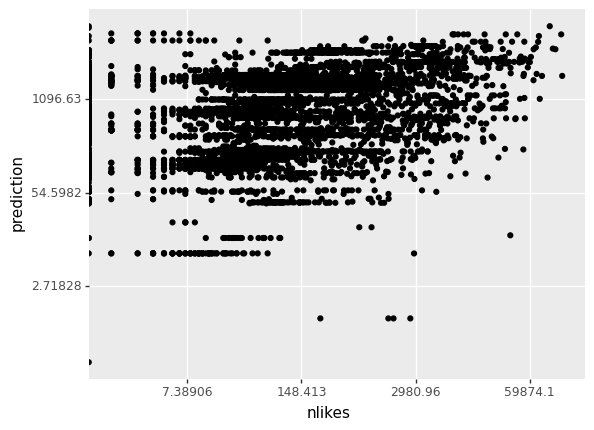

In [122]:
numeric_variables = ['following', 'followers']
numeric_pipeline = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

categoric_variables = ['language']
languages = ['en', 'es']
categoric_pipeline = Pipeline(
    [
        ('encoder', OneHotEncoder(categories=[languages], handle_unknown='ignore'))
    ]
)

# Tenemos que juntar nuestros Pipelines aqui con un sintaxis similar al Pipeline normal
preprocessing = ColumnTransformer(
    [
        ('numeric', numeric_pipeline, numeric_variables),
        ('categorical', categoric_pipeline, categoric_variables)
    ]
)

full_pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('regression', LinearRegression())
    ]
)

X_variables = numeric_variables + categoric_variables
y_variable = 'nlikes'

full_pipeline.fit(train[X_variables], train[y_variable])

test['prediction'] = full_pipeline.predict(test[X_variables])

graph = (
    pn.ggplot(test, pn.aes(x='nlikes', y='prediction')) 
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

In [124]:
from sklearn import set_config

set_config(display='diagram')
full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['following', 'followers']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(categories=[['en',
                                                                                              'es']],
                                                                                 handle_unknown='ignore'))]),
                                                  ['language'])])),
                ('regression', LinearRegression())])

In [123]:
train[X_variables]

,following,followers,language
19451,18,32526661,en
12302,262,20147821,en
11588,422,10255474,en
3509,1785,7881571,es
1126,10449,51402628,en
...,...,...,...
13123,13163,773404,en
19648,502,16749405,en
9845,175,2346732,en
10799,7,11678505,en


Hemos conseguido entranar nuestro modelo empezando con los datos que vemos arriba, que claramente no estan aptos para el modelo, pero gracias al `Pipeline` conseguimos hacer el proceso entero en un paso y sin tocar los datos de test!

## Los modelos disponibles
Ahora vamos a ir viendo los diferentes modelos que hay. Antes de todo - vamos a también crear un target de clasificación para mostrar los modelos de clasificación. Simplemente marcamos si un tweet tuvo más de 50 likes.

Ojo que no vamos a ver temas de evaluación ni optimización hasta el final!

In [127]:
train['nlikes_50'] = train.nlikes > 50
test['nlikes_50'] = test.nlikes > 50

print(train.nlikes_50.mean(), test.nlikes_50.mean())

0.48367309003036124 0.4786065336802544


### GLM
Vamos a ver las regresiones lineales y logisticas

In [128]:
from sklearn.linear_model import LinearRegression, LogisticRegression

X_variables = ['followers', 'video']
y_variable_reg = 'nlikes'
y_variable_class = 'nlikes_50'

In [133]:
reg_model = LinearRegression()
reg_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_lin_reg'] = reg_model.predict(test[X_variables])

In [137]:
log_model = LogisticRegression(random_state=0)
log_model.fit(train[X_variables], train[y_variable_class])
test['predictions_log_reg'] = log_model.predict(test[X_variables])

In [135]:
test[[y_variable_reg, 'predictions_lin_reg']]

,nlikes,predictions_lin_reg
0,29,2694.696111
1,0,117.939524
2,80,1730.958200
3,0,370.134067
4,1,35.568853
...,...,...
6913,66,701.074784
6914,21,328.980402
6915,25,909.861553
6916,29,335.698009


In [140]:
test[[y_variable_class, 'predictions_log_reg']]

,nlikes_50,predictions_log_reg
0,False,True
1,False,True
2,True,True
3,False,True
4,False,True
...,...,...
6913,True,True
6914,False,True
6915,False,True
6916,False,True


Muy similar todo hasta ahora - vamos a mirar las cosas especificas de los GLM

In [143]:
X_variables

['followers', 'video']

In [144]:
reg_model.coef_, reg_model.intercept_

(array([9.49632765e-05, 4.39014623e+02]), 8.995943715480735)

In [145]:
log_model.coef_, reg_model.intercept_

(array([[3.09156896e-08, 1.45362505e-15]]), 8.995943715480735)

Podemos entrar sin intercept si queremos...

In [147]:
reg_model = LinearRegression(fit_intercept=False)
reg_model.fit(train[X_variables], train[y_variable_reg]);

In [148]:
reg_model.coef_, reg_model.intercept_

(array([9.52406595e-05, 4.44132621e+02]), 0.0)

Y tambien hay muchos más hiperparametros con los cuales podemos jugar

Lo más especial de la regresion logistica es poder predecir una probabilidad...

In [150]:
probability = log_model.predict_proba(test[X_variables])

In [151]:
probability

array([[0.32488367, 0.67511633],
       [0.49113417, 0.50886583],
       [0.3634105 , 0.6365895 ],
       ...,
       [0.42720093, 0.57279907],
       [0.47343523, 0.52656477],
       [0.46700252, 0.53299748]])

In [153]:
test['predictions_log_reg_proba'] = probability[:, 1]

In [154]:
test[[y_variable_class, 'predictions_log_reg_proba']]

,nlikes_50,predictions_log_reg_proba
0,False,0.675116
1,False,0.508866
2,True,0.636590
3,False,0.529359
4,False,0.502163
...,...,...
6913,True,0.520585
6914,False,0.526020
6915,False,0.572799
6916,False,0.526565


In [156]:
test.groupby('nlikes_50')[['predictions_log_reg', 'predictions_log_reg_proba']].mean()

,predictions_log_reg,predictions_log_reg_proba
nlikes_50,,
False,True,0.552419
True,True,0.605946


La predicción original no era muy útil porque predecia todo como `True`, pero vemos que la probabilidad si que es más alto para los casos verdaderos,  asi que algo de utilidad si que tiene.

### Near neighbours

In [157]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [168]:
reg_neigh_model = KNeighborsRegressor()
reg_neigh_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_neigh_reg'] = reg_neigh_model.predict(test[X_variables])

In [169]:
clas_neigh_model = KNeighborsClassifier()
clas_neigh_model.fit(train[X_variables], train[y_variable_class])
test['predictions_neigh_clas'] = clas_neigh_model.predict(test[X_variables])

In [160]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_neigh_reg']]

,nlikes,predictions_lin_reg,predictions_neigh_reg
0,29,2694.696111,125.2
1,0,117.939524,25.6
2,80,1730.958200,654.0
3,0,370.134067,16.2
4,1,35.568853,6.6
...,...,...,...
6913,66,701.074784,167.6
6914,21,328.980402,123.0
6915,25,909.861553,28.0
6916,29,335.698009,21.4


In [161]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_neigh_clas']]

,nlikes_50,predictions_log_reg,predictions_neigh_clas
0,False,True,True
1,False,True,False
2,True,True,True
3,False,True,False
4,False,True,False
...,...,...,...
6913,True,True,True
6914,False,True,True
6915,False,True,False
6916,False,True,False


Cambiamos el número de vecinos a utilizar para ver cómo cambian los resultados...

In [170]:
reg_neigh_model = KNeighborsRegressor(n_neighbors=10)
reg_neigh_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_neigh_reg_10'] = reg_neigh_model.predict(test[X_variables])

In [171]:
clas_neigh_model = KNeighborsClassifier(n_neighbors=10)
clas_neigh_model.fit(train[X_variables], train[y_variable_class])
test['predictions_neigh_clas_10'] = clas_neigh_model.predict(test[X_variables])

In [172]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_neigh_reg', 'predictions_neigh_reg_10']].mean()

nlikes                      1131.044088
predictions_lin_reg         1161.000078
predictions_neigh_reg       1135.369124
predictions_neigh_reg_10    1125.861232
dtype: float64

In [173]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_neigh_clas', 'predictions_neigh_clas_10']].mean()

nlikes_50                    0.478607
predictions_log_reg          1.000000
predictions_neigh_clas       0.490460
predictions_neigh_clas_10    0.452587
dtype: float64

So we seem to have become more conservative in increasing the number of neighbours, which makes some sense.

### SVM
Ahora es muy importante escalar los datos - asi que volvems a nuestro pipeline!

In [469]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [470]:
reg_svm_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVR())
    ]
)

reg_svm_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_svm_reg'] = reg_svm_model.predict(test[X_variables])

In [471]:
clas_svm_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC())
    ]
)

clas_svm_model.fit(train[X_variables], train[y_variable_class])
test['predictions_svm_clas'] = clas_svm_model.predict(test[X_variables])

In [472]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_svm_reg']]

,nlikes,predictions_lin_reg,predictions_svm_reg
0,29,2694.696111,92.900117
1,0,117.939524,10.805906
2,80,1730.958200,83.768280
3,0,370.134067,20.250773
4,1,35.568853,8.885661
...,...,...,...
6913,66,701.074784,67.724633
6914,21,328.980402,18.390857
6915,25,909.861553,50.093931
6916,29,335.698009,18.687058


In [473]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_svm_clas']]

,nlikes_50,predictions_log_reg,predictions_svm_clas
0,False,True,True
1,False,True,False
2,True,True,True
3,False,True,False
4,False,True,False
...,...,...,...
6913,True,True,True
6914,False,True,False
6915,False,True,False
6916,False,True,False


Lo más interesante de los SVM es cambiar el kernel, asi que intentamos hacer esto para ver como cambian los resultados...

In [475]:
clas_svm_kernel_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear'))
    ]
)

clas_svm_kernel_model.fit(train[X_variables], train[y_variable_class])
test['predictions_svm_kernel_clas'] = clas_svm_kernel_model.predict(test[X_variables])

In [476]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_svm_clas', 'predictions_svm_kernel_clas']]

,nlikes_50,predictions_log_reg,predictions_svm_clas,predictions_svm_kernel_clas
0,False,True,True,True
1,False,True,False,False
2,True,True,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
6913,True,True,True,True
6914,False,True,False,False
6915,False,True,False,False
6916,False,True,False,False


Y también tenemos muchas más posibilidades para ajustar los hiperparametros...

### Arboles
Los modelos basados en arboles son muchos y son muy poderosos! Para aprovechar de esto, también vamos a explotar unas variables más.

In [376]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [377]:
X_variables = ['followers', 'retweet', 'video', 'tweets', 'likes', 'following', 'media', 'verified', 'day', 'hour']

In [378]:
reg_tree_model = DecisionTreeRegressor(random_state=0)
reg_tree_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_tree_reg'] = reg_tree_model.predict(test[X_variables])

In [379]:
clas_tree_model = DecisionTreeClassifier(random_state=0)
clas_tree_model.fit(train[X_variables], train[y_variable_class])
test['predictions_tree_clas'] = clas_tree_model.predict(test[X_variables])

In [380]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_tree_reg']]

,nlikes,predictions_lin_reg,predictions_tree_reg
0,29,2694.696111,80.307692
1,0,117.939524,0.000000
2,80,1730.958200,264.428571
3,0,370.134067,0.000000
4,1,35.568853,9.000000
...,...,...,...
6913,66,701.074784,58.000000
6914,21,328.980402,2473.000000
6915,25,909.861553,83.000000
6916,29,335.698009,9.000000


In [381]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_tree_clas']]

,nlikes_50,predictions_log_reg,predictions_tree_clas
0,False,True,True
1,False,True,False
2,True,True,True
3,False,True,False
4,False,True,False
...,...,...,...
6913,True,True,True
6914,False,True,True
6915,False,True,True
6916,False,True,False


Lo otro interesante de estos modelos es que son faciles de intepretar, por ejemplo, podemos dibujar el "arbol" para entenderlo. Vamos a entrenar un modelo reducido para visualizar mejor. Explicaremos el parametro `max_depth` despues.

In [382]:
from sklearn import tree
from matplotlib import pyplot as plt

In [383]:
clas_tree_model_reduced = DecisionTreeClassifier(max_depth=3)
clas_tree_model_reduced.fit(train[X_variables], train[y_variable_class]);

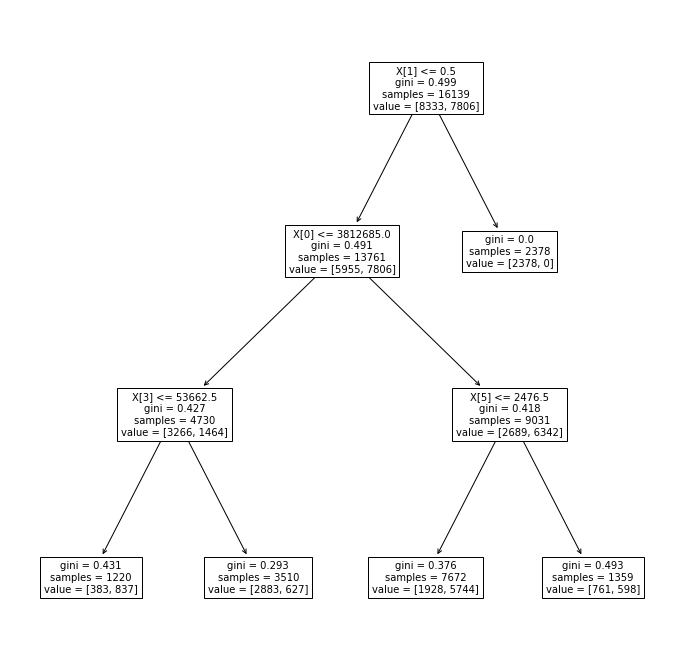

In [384]:
plt.figure(figsize=(12, 12))
tree.plot_tree(clas_tree_model_reduced, fontsize=10)
plt.show()

In [387]:
[(i, variable) for i, variable in enumerate(X_variables)]

[(0, 'followers'),
 (1, 'retweet'),
 (2, 'video'),
 (3, 'tweets'),
 (4, 'likes'),
 (5, 'following'),
 (6, 'media'),
 (7, 'verified'),
 (8, 'day'),
 (9, 'hour')]

Otra cosa que también podemos ver es la "importancia" de cada feature:

In [389]:
[(imp, variable) for imp, variable in zip(clas_tree_model_reduced.feature_importances_, X_variables)]

[(0.3247484629107364, 'followers'),
 (0.4425326158291269, 'retweet'),
 (0.0, 'video'),
 (0.15811254935048252, 'tweets'),
 (0.0, 'likes'),
 (0.07460637190965423, 'following'),
 (0.0, 'media'),
 (0.0, 'verified'),
 (0.0, 'day'),
 (0.0, 'hour')]

Apreciamos que el número de followers, following, si es un retweet y el número de tweets total son los más imporatntes, ya que han pertimido reducir más el error. Esto se puede utilizar para feature seleccion en otro momento.

El poder real de los modelos de arboles vienen con ensembling. Un modelo que aprovecha de ensembling es el RandomForest - asi que probamos a implementarlo aquí.

In [390]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [400]:
reg_rf_model = RandomForestRegressor(random_state=0)
reg_rf_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_rf_reg'] = reg_rf_model.predict(test[X_variables])

In [392]:
clas_rf_model = RandomForestClassifier(random_state=0)
clas_rf_model.fit(train[X_variables], train[y_variable_class])
test['predictions_rf_clas'] = clas_rf_model.predict(test[X_variables])

In [401]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_tree_reg', 'predictions_rf_reg']]

,nlikes,predictions_lin_reg,predictions_tree_reg,predictions_rf_reg
0,29,2694.696111,80.307692,82.010139
1,0,117.939524,0.000000,7.808000
2,80,1730.958200,264.428571,270.041693
3,0,370.134067,0.000000,0.000000
4,1,35.568853,9.000000,9.090000
...,...,...,...,...
6913,66,701.074784,58.000000,84.957500
6914,21,328.980402,2473.000000,598.511143
6915,25,909.861553,83.000000,64.220000
6916,29,335.698009,9.000000,9.195310


In [402]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_tree_clas', 'predictions_rf_clas']]

,nlikes_50,predictions_log_reg,predictions_tree_clas,predictions_rf_clas
0,False,True,True,True
1,False,True,False,False
2,True,True,True,True
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
6913,True,True,True,True
6914,False,True,True,True
6915,False,True,True,True
6916,False,True,False,False


Los modelos basados en arboles son muy propoensos a overfitting - asi que vamos a ajustar diferentes parametros para limitar estos efectos. Primero introducimos el concepto del `score` de un modelo. Es una metrica estandar para el algoritmo (luego veremos más sobre evaluación).

Para mostrar el overfitting vamos a coger una muestra reducida del train y adjustar los parametros del modelo para provocar un sobre entrenamiento.

In [403]:
reduced_train = train.sample(1000, random_state=0)

clas_rf_model_overtrain = RandomForestClassifier(n_estimators=1000, random_state=0)
clas_rf_model_overtrain.fit(reduced_train[X_variables], reduced_train[y_variable_class]);

In [404]:
clas_rf_model_overtrain.score(reduced_train[X_variables], reduced_train[y_variable_class]).round(2)

0.98

In [405]:
clas_rf_model_overtrain.score(test[X_variables], test[y_variable_class]).round(2)

0.81

Vemos que hemos producido un modelo que tiene una gran diferencia entre el score de train y test - indicando que hay algo de overfitting.

Limitamos lo profundo que puede ser el arbol y tambien cuantos ejemplos puede estar en el split. 

In [423]:
clas_rf_model_overtrain_adj = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=7, min_samples_leaf=3, random_state=0)
clas_rf_model_overtrain_adj.fit(reduced_train[X_variables], reduced_train[y_variable_class]);

In [424]:
clas_rf_model_overtrain_adj.score(reduced_train[X_variables], reduced_train[y_variable_class]).round(2)

0.9

In [425]:
clas_rf_model_overtrain_adj.score(test[X_variables], test[y_variable_class]).round(2)

0.81

Vemos que hemos conseguido reducir mucho la diferencia entre el train y test, manteniendo el score de test más o menos igual. También vimos antes que reduciendo el `max_depth` fue más facil visualizar el arbol.

### Redes neurales
Con los redes neurales tenemos muchas maneras de construir la red, desde las funciones de activación hasta la arquitectura. Probamos a ver cómo se hacen los distintos aspectos.

In [426]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [443]:
X_variables = ['followers', 'video']

In [444]:
reg_nn_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPRegressor(random_state=0))
    ]
)

reg_nn_model = MLPRegressor()
reg_nn_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_nn_reg'] = reg_nn_model.predict(test[X_variables])

In [445]:
clas_nn_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(random_state=0))
    ]
)

clas_nn_model.fit(train[X_variables], train[y_variable_class])
test['predictions_nn_clas'] = clas_nn_model.predict(test[X_variables])

In [446]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_nn_reg']]

,nlikes,predictions_lin_reg,predictions_nn_reg
0,29,2694.696111,982.350938
1,0,117.939524,47.978099
2,80,1730.958200,752.918723
3,0,370.134067,158.195160
4,1,35.568853,11.979487
...,...,...,...
6913,66,701.074784,111.074813
6914,21,328.980402,140.209695
6915,25,909.861553,394.073291
6916,29,335.698009,143.145504


In [447]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_nn_clas']]

,nlikes_50,predictions_log_reg,predictions_nn_clas
0,False,True,True
1,False,True,False
2,True,True,True
3,False,True,False
4,False,True,False
...,...,...,...
6913,True,True,True
6914,False,True,False
6915,False,True,True
6916,False,True,False


Aquí tenemos muchisimas opciones para ajustar la arquitectura de la red - jugamos un poco!

In [451]:
clas_nn_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model.fit(train[X_variables], train[y_variable_class])
test['predictions_nn_clas_arq'] = clas_nn_model.predict(test[X_variables])

In [452]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_nn_clas', 'predictions_nn_clas_arq']].mean()

nlikes_50                  0.478607
predictions_log_reg        1.000000
predictions_nn_clas        0.459092
predictions_nn_clas_arq    0.469211
dtype: float64

También es muy importante el overfitting. Para las redes neurales algo muy tipico es aplicar "regularización" que se hace con un parametro simple. Probamos para predecir la probabilidad.

In [467]:
clas_nn_model_alpha = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(alpha=0.001, random_state=0))
    ]
)

clas_nn_model_alpha.fit(train[X_variables], train[y_variable_class])
test['predictions_nn_clas_proba'] = clas_nn_model.predict_proba(test[X_variables])[:,1]

In [468]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_nn_clas', 'predictions_nn_clas_proba']]

,nlikes_50,predictions_log_reg,predictions_nn_clas,predictions_nn_clas_proba
0,False,True,True,0.727674
1,False,True,False,0.173889
2,True,True,True,0.750871
3,False,True,False,0.351912
4,False,True,False,0.147877
...,...,...,...,...
6913,True,True,True,0.554094
6914,False,True,False,0.313640
6915,False,True,True,0.512717
6916,False,True,False,0.319734


## Evaluación
Ahora venimos a una parte fundamental para ML - la evaluación de nuestros resultados!

In [477]:
from sklearn.metrics import accuracy_score

In [495]:
for prediction in [col for col in test if '_clas' in col]:
    if 'proba' not in prediction:
        acc = accuracy_score(test[y_variable_class], test[prediction])
        print(f'For {prediction} we scored {acc:.0%}')

For predictions_neigh_clas we scored 77%
For predictions_neigh_clas_10 we scored 77%
For predictions_tree_clas we scored 82%
For predictions_rf_clas we scored 84%
For predictions_nn_clas we scored 67%
For predictions_nn_clas_arq we scored 67%
For predictions_svm_clas we scored 68%
For predictions_svm_kernel_clas_linear we scored 63%
For predictions_svm_kernel_clas we scored 63%


Depende de la metrica, pero es normalmente tan facil como coger el resultado verdadero y la prediccion.

In [487]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, mean_absolute_error, mean_squared_error

In [500]:
for prediction in [col for col in test if '_reg' in col]:
    if 'proba' not in prediction:
        print(f'For {prediction} we had an MAE of {mean_absolute_error(test[y_variable_reg], test[prediction])}')
        print(f'For {prediction} we had a MSE of {mean_squared_error(test[y_variable_reg], test[prediction])}')
        print(f'For {prediction} we had a RMSE of {mean_squared_error(test[y_variable_reg], test[prediction], squared=False)}')
    
    print('\n')

For predictions_lin_reg we had an MAE of 1724.334345125972
For predictions_lin_reg we had a MSE of 34253449.42486469
For predictions_lin_reg we had a RMSE of 5852.6446521948255


For predictions_dt_reg we had an MAE of 851.1597952533331
For predictions_dt_reg we had a MSE of 17306014.59148863
For predictions_dt_reg we had a RMSE of 4160.049830409322


For predictions_log_reg we had an MAE of 1130.3548713501011
For predictions_log_reg we had a MSE of 37247541.41066782
For predictions_log_reg we had a RMSE of 6103.076389057229




For predictions_neigh_reg we had an MAE of 1113.6602775368603
For predictions_neigh_reg we had a MSE of 27981421.82356172
For predictions_neigh_reg we had a RMSE of 5289.746858174001


For predictions_neigh_reg_10 we had an MAE of 1143.3209598149754
For predictions_neigh_reg_10 we had a MSE of 25218214.837169703
For predictions_neigh_reg_10 we had a RMSE of 5021.774072692807


For predictions_tree_reg we had an MAE of 1195.9271848521255
For predictions_tree_reg

In [498]:
for prediction in [col for col in test if '_clas' in col]:
    if 'proba' not in prediction:
        print(f'For {prediction} we had an accuracy of {accuracy_score(test[y_variable_class], test[prediction]):.0%}')
        print(f'For {prediction} we had a precision of {precision_score(test[y_variable_class], test[prediction]):.0%}')
        print(f'For {prediction} we had a recall of {recall_score(test[y_variable_class], test[prediction]):.0%}')
    else:
        print(f'For {prediction} we had an AUC of {roc_auc_score(test[y_variable_class], test[prediction]):.0%}')
    
    print('\n')

For predictions_neigh_clas we had an accuracy of 77%
For predictions_neigh_clas we had a precision of 75%
For predictions_neigh_clas we had a recall of 77%


For predictions_neigh_clas_10 we had an accuracy of 77%
For predictions_neigh_clas_10 we had a precision of 77%
For predictions_neigh_clas_10 we had a recall of 73%


For predictions_tree_clas we had an accuracy of 82%
For predictions_tree_clas we had a precision of 82%
For predictions_tree_clas we had a recall of 81%


For predictions_rf_clas we had an accuracy of 84%
For predictions_rf_clas we had a precision of 82%
For predictions_rf_clas we had a recall of 86%


For predictions_nn_clas we had an accuracy of 67%
For predictions_nn_clas we had a precision of 66%
For predictions_nn_clas we had a recall of 63%


For predictions_nn_clas_arq we had an accuracy of 67%
For predictions_nn_clas_arq we had a precision of 66%
For predictions_nn_clas_arq we had a recall of 65%


For predictions_nn_clas_proba we had an AUC of 74%


For pred

### Evaluacion grafica
Vamos a ver algunas tecnicas para la evaluacion grafica...

In [515]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_curve

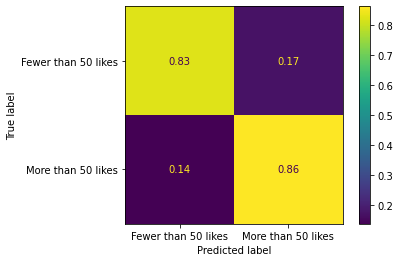

In [509]:
X_variables = ['followers', 'retweet', 'video', 'tweets', 'likes', 'following', 'media', 'verified', 'day', 'hour']

plot_confusion_matrix(clas_rf_model, test[X_variables], test[y_variable_class], normalize='true', display_labels=['Fewer than 50 likes', 'More than 50 likes'])

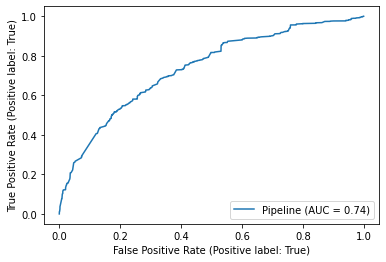

In [512]:
X_variables = ['followers', 'video']

plot_roc_curve(clas_nn_model, test[X_variables], test[y_variable_class])

In [526]:
roc_data = pd.DataFrame(roc_curve(test[y_variable_class], test['predictions_nn_clas_proba'])).transpose().reset_index(drop=True)
roc_data

,0,1,2
0,0.000000,0.000000,1.967024
1,0.000000,0.000302,0.967024
2,0.000000,0.004530,0.966181
3,0.000000,0.005134,0.960133
4,0.000000,0.007551,0.959937
...,...,...,...
730,0.998337,0.998792,0.142488
731,0.998614,0.999396,0.142121
732,0.999168,0.999396,0.141957
733,0.999723,1.000000,0.141603


De esta forma tenemos maneras de evaluar los resultados visualmente de forma sencilla! También podemos sacar los datos nosotros mismos.

### Calibracion
"Entrenamos" un nuevo modelo que nos permite calibrar la probabilidad.

In [528]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [529]:
X_variables = ['followers', 'retweet', 'video', 'tweets', 'likes', 'following', 'media', 'verified', 'day', 'hour']

In [533]:
model_to_calibrate = RandomForestClassifier(random_state=0)
calibrated_model = CalibratedClassifierCV(model_to_calibrate)
calibrated_model.fit(train[X_variables], train[y_variable_class])
test['predictions_rf_clas_proba_calibrated'] = calibrated_model.predict_proba(test[X_variables])[:,1]
test['predictions_rf_clas_proba_uncalibrated'] = clas_rf_model.predict_proba(test[X_variables])[:,1]

In [534]:
roc_auc_score(test[y_variable_class], test['predictions_rf_clas_proba_uncalibrated'])

0.9189260588219976

In [535]:
roc_auc_score(test[y_variable_class], test['predictions_rf_clas_proba_calibrated'])

0.9238154576611453

In [541]:
test[[y_variable_class, 'predictions_rf_clas_proba_uncalibrated', 'predictions_rf_clas_proba_calibrated']]

,nlikes_50,predictions_rf_clas_proba_uncalibrated,predictions_rf_clas_proba_calibrated
0,False,0.698799,0.713158
1,False,0.000000,0.075457
2,True,0.689421,0.688805
3,False,0.000000,0.075457
4,False,0.000000,0.075457
...,...,...,...
6913,True,1.000000,0.919846
6914,False,0.857119,0.768860
6915,False,0.685000,0.632801
6916,False,0.002000,0.078582


In [543]:
test[['predictions_rf_clas_proba_uncalibrated', 'predictions_rf_clas_proba_calibrated']].describe()

,predictions_rf_clas_proba_uncalibrated,predictions_rf_clas_proba_calibrated
count,6918.000000,6918.000000
mean,0.485960,0.488678
std,0.421006,0.361810
min,0.000000,0.075457
25%,0.002500,0.079003
50%,0.507889,0.502056
75%,0.956500,0.893321
max,1.000000,0.919846


/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


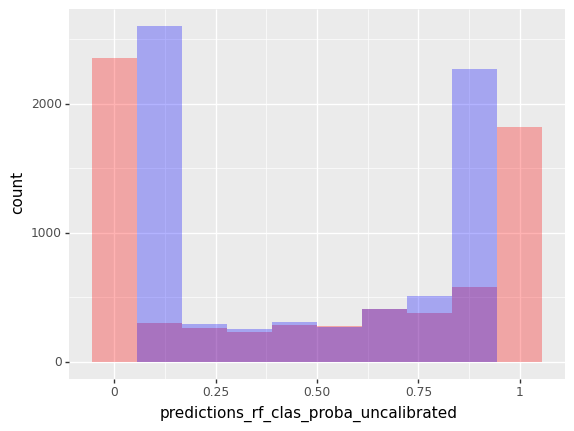

In [539]:
graph = (
    pn.ggplot(test) 
    + pn.geom_histogram(pn.aes(x='predictions_rf_clas_proba_uncalibrated'), fill='red', alpha=0.3)
    + pn.geom_histogram(pn.aes(x='predictions_rf_clas_proba_calibrated'), fill='blue', alpha=0.3)
)

graph.draw();

Vemos que ya es menos extremo y se comporta un poco mejor.

## Optimización
Hay varios aspectos de optimización - es un campo muy grande! Vamos a ver distintos aspectos.

In [559]:
clas_nn_model_param_1 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(random_state=0))
    ]
)

clas_nn_model_param_1.fit(train[X_variables], train[y_variable_class])
clas_nn_model_param_1.score(test[X_variables], test[y_variable_class])

/home/andreas/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.8164209309048858

In [560]:
clas_nn_model_param_2 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model_param_2.fit(train[X_variables], train[y_variable_class])
clas_nn_model_param_2.score(test[X_variables], test[y_variable_class])

0.8235039028620988

Conseguimos mejorar el score casi 1 punto de forma ranzom!

### Elegiendo los features
Primero vemos de nuestro random forest cuales son los mejores features.

In [545]:
[(variable, importance) for variable, importance in zip(X_variables, clas_rf_model.feature_importances_)]

[('followers', 0.19520215057853352),
 ('retweet', 0.19134367969420235),
 ('video', 0.0356256991586833),
 ('tweets', 0.09981566671023057),
 ('likes', 0.08949215191889585),
 ('following', 0.07626980175954086),
 ('media', 0.07599246986928933),
 ('verified', 0.003208423380387915),
 ('day', 0.0558767879646945),
 ('hour', 0.17717316896554167)]

In [546]:
[variable for variable, importance in zip(X_variables, clas_rf_model.feature_importances_) if importance > 0.15]

['followers', 'retweet', 'hour']

Ahora vamos a probar uno de los otros metodos: elegir features que tengan una varianza aceptable

In [548]:
from sklearn.feature_selection import VarianceThreshold

In [557]:
train[X_variables].head()

,followers,retweet,video,tweets,likes,following,media,verified,day,hour
0,32526661,True,0,332018,13,18,25403,True,5,16
1,20147821,False,0,431779,2,262,138272,True,7,7
2,10255474,False,0,130899,5099,422,29050,True,5,9
3,7881571,False,0,380692,7675,1785,122791,True,7,0
4,51402628,False,0,13725,5874,10449,2232,True,5,16


In [550]:
base_p = train[y_variable_class].mean()
min_variance = (1 - base_p) * base_p
feature_selector = VarianceThreshold(min_variance)
feature_selector.fit(train[X_variables])

pd.DataFrame(feature_selector.transform(train[X_variables]))

,0,1,2,3,4,5,6
0,32526661,332018,13,18,25403,5,16
1,20147821,431779,2,262,138272,7,7
2,10255474,130899,5099,422,29050,5,9
3,7881571,380692,7675,1785,122791,7,0
4,51402628,13725,5874,10449,2232,5,16
...,...,...,...,...,...,...,...
16134,773404,115679,6942,13163,73156,5,20
16135,16749405,355742,23,502,168669,7,0
16136,2346732,5683,3023,175,1548,4,4
16137,11678505,82865,3,7,43980,4,22


Vemos que directamente ha quitado algunas columnas ya que no cumplia la minima de varianza

In [562]:
important_features = ['followers', 'retweet', 'hour']

In [563]:
clas_nn_model_param_2_features = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model_param_2_features.fit(train[important_features], train[y_variable_class])
clas_nn_model_param_2_features.score(test[important_features], test[y_variable_class])

0.723619543220584

In [564]:
clas_nn_model_param_2_features = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model_param_2_features.fit(feature_selector.transform(train[X_variables]), train[y_variable_class])
clas_nn_model_param_2_features.score(feature_selector.transform(test[X_variables]), test[y_variable_class])

0.7625036137612027

Vemos que en estos 2 casos no hemos hecho ninguna mejora. Entendemos ahora que optimización es muy complejo y donde podemos invertir muchos recursos y tampoco sin mucho exito! Lo veremos ahora, pero por esto los Pipelines son aun más importantes.

### Optimizacion formal
Implementamos un metodo brute force con cross validation.

In [565]:
from sklearn.model_selection import GridSearchCV

In [566]:
grid = {
    'n_estimators' : [100, 500],
    'max_depth' : [None, 5, 10]
}

model = RandomForestClassifier(random_state=0)

optimized_rf_class = GridSearchCV(model, grid)
optimized_rf_class.fit(train[X_variables], train[y_variable_class])
optimized_rf_class.score(test[X_variables], test[y_variable_class])

0.853281295172015

In [567]:
unoptimized_rf_class = RandomForestClassifier(random_state=0)
unoptimized_rf_class.fit(train[X_variables], train[y_variable_class])
unoptimized_rf_class.score(test[X_variables], test[y_variable_class])

0.8430182133564614

Asi que hemos conseguido mejorar 1 punto pero ahora de forma más estructurada! Podemos ver varios aspectos de la busqueda, lo más importante siendo el mejor estimador.

In [570]:
optimized_rf_class.best_params_

{'max_depth': 10, 'n_estimators': 100}

### Un paso más alla
Ahora podemos combinar esto con nuestros pipelines de antes. Como los pipelines adoptan el sintaxis de un modelo normal - también se pueden optimizar! Solo tenemos que tener algo de cuidado con nuestros nombres. Probamos a optimizar el feature selection que hicimos antes.

In [572]:
pipeline = Pipeline(
    [
        ('feature_selector', VarianceThreshold()),
        ('rf', RandomForestClassifier(random_state=0))
    ]
)

grid = {
    'feature_selector__threshold' : [0, 0.2],
    'rf__n_estimators' : [100, 500],
    'rf__max_depth' : [None, 5, 10]
}

optimized_feature_selection_class = GridSearchCV(pipeline, grid)
optimized_feature_selection_class.fit(train[X_variables], train[y_variable_class])
optimized_feature_selection_class.score(test[X_variables], test[y_variable_class])

0.853281295172015

In [573]:
optimized_feature_selection_class.best_params_

{'feature_selector__threshold': 0,
 'rf__max_depth': 10,
 'rf__n_estimators': 100}

Vemos ahora que nuestra optimización nos devuelve el mismo resultado que antes: que es mejor no aplicar el filtro de varianza! Podemos estar aquí todo el dia haciendo optimización - pero lo importante es entender como ahora podemos hacer una optimización de todos los pasos de nuestro pipeline de forma estructurada.